## Assigments 1.1

This first part of the assignments is based on the iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# importing the data from sklearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# extracting the relevant information
data = iris_dataset.data
data_feature_names = iris_dataset.feature_names
target = iris_dataset.target
target_names = iris_dataset.target_names

print('There are ' + str(len(data_feature_names)) + ' features, whose names are: \n' + str(data_feature_names))
print('\nThere are ' + str(len(target_names)) + ' classes to predict, whose names are: \n' + str(target_names))
print('\nThere are ' + str(data.shape[0]) + ' observations')

There are 4 features, whose names are: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

There are 3 classes to predict, whose names are: 
['setosa' 'versicolor' 'virginica']

There are 150 observations


$\mathbf{Exercise\, 1.}$ Compute the median, mean and standard deviation for each of the 4 features in the iris dataset (don't use numpy or other pre-defined functions, write your own routine).

In [39]:
med=[]
def median_n(data):
    sorted_data= np.sort(data)
    m= (len(data)//2) # Here I learned that we can use "//" for division so that result is always in integer.
    if m%2==0:
        median=(sorted_data[m]+sorted_data[m-1])/2 #if the number of elements are even we take the data from position middle and middle-1 
    else:
        median= sorted_data[m] #if the number of elements are odd we directly divide by 2 and get the middle positioned element
    return median


for j in range (len(data_feature_names)): 
    feature=[data[i][j] for i in range(len(data))] #Extracting the elements
    median= median_n(feature) #calling the function 
    med.append(median)
    
print("median",med)


median [5.8, 3.0, 4.4, 1.3]


In [41]:
mea=[]
def mean_n(data):
    mean_data=sum(data)/len(data)
    
    return mean_data

for j in range (len(data_feature_names)):
    feature=[data[i][j] for i in range(len(data))]
    mean= mean_n(feature)
    mea.append(mean)
print("Mean",mea)

Mean [5.843333333333335, 3.057333333333334, 3.7580000000000027, 1.199333333333334]


In [42]:

std=[]
def std_dev(data, mean):
    m= len(data)
    var= sum([(x - mean)**2 for x in data]) / m
    return var**0.5 


for j in range (len(data_feature_names)):
    feature=[data[i][j] for i in range(len(data))]
    
    standard_deviation= std_dev(feature,mean)
    std.append(standard_deviation)

print("Standard Deviation",std)

Standard Deviation [4.716763532574239, 1.9081081963266362, 3.105201728998903, 0.7596926279021594]


$\mathbf{Exercise\, 2.}$ For each feature, generate 150 Gaussian distributed samples with the same mean and standard_deviation computed in Exercise 1.

In [11]:
import numpy as np

def generate_gaussian_samples(mean, std_dev, sample_size):
    return np.random.normal(mean, std_dev, sample_size)

samples = []

for j in range (len(data_feature_names)):
    feature=[data[i][j] for i in range(len(data))]
    mean= mean_n(feature)
    standard_deviation= std_dev(feature,mean)
    samples.append(generate_gaussian_samples(mean, standard_deviation, 150))
print(samples)

[array([5.45611259, 6.06953204, 6.19863317, 5.82732309, 5.23953932,
       5.10185741, 5.2119258 , 6.98080829, 5.86617942, 4.72322704,
       5.02364664, 4.36129284, 5.34570976, 5.10639782, 4.52382253,
       5.47508875, 5.83264584, 5.3143141 , 7.47568371, 7.06102811,
       4.92701757, 5.58260707, 6.27068062, 5.55312636, 5.63983696,
       6.16707563, 6.71274938, 5.2470363 , 5.68106581, 5.16290738,
       5.80547017, 6.3504711 , 6.01418045, 6.30404877, 4.18754923,
       7.33996331, 5.14838156, 6.32803612, 5.63013375, 5.05837488,
       6.97752595, 5.61094582, 6.10632929, 5.40145155, 5.1787341 ,
       5.45241169, 6.11677961, 6.65093409, 5.72865221, 5.94224223,
       5.70232718, 5.2357645 , 5.72186881, 7.7896617 , 6.31189691,
       4.8661616 , 6.27861132, 8.04197004, 7.17863542, 5.5059863 ,
       4.87592608, 6.39575119, 6.80120898, 5.87135311, 6.92382229,
       5.39022158, 5.09426635, 6.26656339, 5.36664841, 4.60675081,
       6.03377972, 5.18535324, 4.2127494 , 4.75512487, 4.8257

$\mathbf{Exercise\, 3.}$ Compute the histogram (with 30 bins) of the distribution of the generate samples and plot it together with the histogram of the original data. The histograms must be plotted on the same plot. Comment on the difference between simulations and real data: for which feature the distributions are most different? What is the reason? 

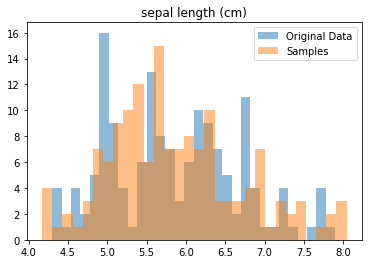

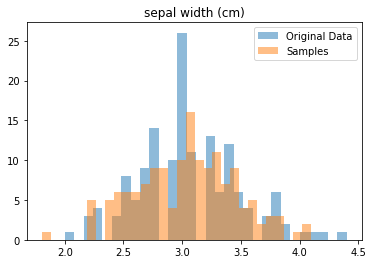

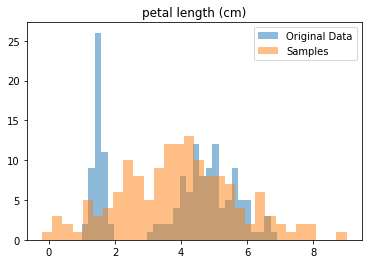

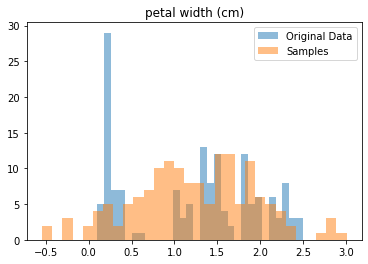

In [12]:
for j in range(4):
    feature = [data[i][j] for i in range(len(data))]
    feature_samples = samples[j]
    plt.hist(feature, bins=30, alpha=0.5, label='Original Data')
    plt.hist(feature_samples, bins=30, alpha=0.5, label='Samples')
    plt.legend(loc='upper right')
    plt.title(data_feature_names[j])
    plt.show()

The difference between simulations and real data can depend on the feature. Some features might have distributions that are similar between the original data and the generated samples, while others might have more noticeable differences.

The reason for these differences can be due to the presence of outliers or non-Gaussian distributions in the original data that are not captured by the Gaussian distributions generated from the mean and standard deviation. Additionally, the sample size of 150 is relatively small, which can lead to higher variability in the generated samples compared to the original data.


$\mathbf{Exercise\, 4.}$ Estimate and plot the probability density function of the feature $\mbox{petal length (cm)}$.


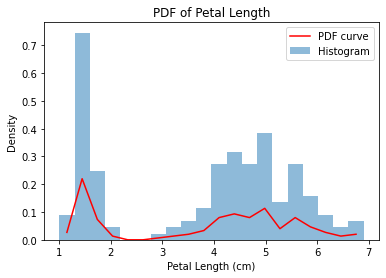

In [13]:
petal_length = data[:, 2]
bins = 20
n, bins, patches = plt.hist(petal_length, bins=bins, density=True, alpha=0.5, label='Histogram')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
pdf = n / sum(n)
plt.plot(bin_centers, pdf, 'r', label='PDF curve')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Density')
plt.title('PDF of Petal Length')
plt.legend()
plt.show()


## Assigment 1.2

$\mathbf{Exercise\, 1.}$ Create a linear benchmark, where the dimension of the input data $X$ is 2, and the dimension of the output data $y$ is 1. Choose the amount of noise and sample size.

Evaluate the prediction metrics for the following regression methods:

- Linear regression
- Support Vector Regression with RBF kernel
- Decision Tree Regression


In [14]:
import numpy as np
import random

# sample size and noise level
sample_size = 100
noise_level = 0.1

# input data with dimension 2
X = np.random.rand(sample_size, 2)


#the weights and bias are the parameters that determine the linear relationship 
#between the input data X and the output data y. 
#The weights determine the slope of the line, while the bias determines the intercept.

weights = np.random.rand(2)
bias = np.random.rand()

# Generate output data with dimension 1
noise = noise_level * np.random.randn(sample_size)
y = np.dot(X, weights) + bias 
y_noise= y+noise #adding the noise to y

In [15]:
y

array([1.48281092, 1.50157408, 2.38832655, 1.84614164, 1.87704744,
       1.78913362, 1.71155416, 1.93381392, 1.24249682, 2.01413117,
       2.0709316 , 1.75843057, 1.70726832, 1.81660692, 1.45217015,
       1.8366866 , 1.72467822, 2.30916523, 1.47456225, 1.84531178,
       1.88465956, 1.73569792, 1.59410977, 1.30763348, 1.78148844,
       1.70674151, 1.83316764, 1.51188156, 1.90391916, 1.10875261,
       1.82474206, 1.64044114, 1.53826122, 2.18259621, 1.7234143 ,
       1.38661526, 1.54806915, 1.21601586, 1.71210166, 1.40464001,
       1.32132474, 1.75856196, 1.52080256, 1.96217064, 1.80994121,
       1.48533698, 1.4748913 , 1.14036703, 1.06929468, 1.54748312,
       1.48876622, 1.57794056, 1.32890458, 2.18306312, 1.87970791,
       1.26091036, 1.82377734, 1.17125414, 1.68302743, 1.83376205,
       1.20617982, 1.52210613, 1.89655389, 1.8613118 , 1.337965  ,
       1.73482405, 1.70307134, 1.32720526, 1.41208198, 1.75078575,
       1.69972441, 2.22757223, 1.19027956, 2.10911364, 1.63721

In [16]:
y_noise

array([1.50151984, 1.49919158, 2.44977944, 1.97687354, 2.0868816 ,
       1.67358606, 1.56357083, 1.83389255, 1.21409337, 2.09061099,
       2.15072518, 1.89443586, 1.36565074, 1.73413849, 1.37050461,
       1.89873161, 1.71211614, 2.38067826, 1.49792588, 1.86350609,
       2.1336685 , 1.88302259, 1.54561409, 1.22758572, 1.70871101,
       1.55541747, 2.02398126, 1.55218239, 1.92539988, 1.16995272,
       1.71521278, 1.6770278 , 1.60229945, 2.12117378, 1.6209731 ,
       1.30776815, 1.60645629, 1.30674301, 1.52690373, 1.44625193,
       1.35280561, 1.88089574, 1.55369623, 1.93492709, 1.65752946,
       1.57433895, 1.48647675, 1.21874691, 1.10435391, 1.64078677,
       1.66034188, 1.53091667, 1.40144982, 2.15757922, 1.82246949,
       1.09146063, 1.69838663, 1.18520932, 1.66057606, 1.89094369,
       1.33324337, 1.64424382, 2.00770327, 1.61330245, 1.33757988,
       1.57466292, 1.44395184, 1.24024612, 1.29809268, 1.81884427,
       1.71877375, 2.20817859, 1.29249848, 2.18369234, 1.53160

In [17]:
from sklearn.linear_model import LinearRegression

# Fit the linear regression model to the data
reg = LinearRegression().fit(X, y)

# Get the estimated weights and bias
weights = reg.coef_
bias = reg.intercept_

print("Estimated weights:", weights)
print("Estimated bias:", bias)


Estimated weights: [0.67885842 0.85839502]
Estimated bias: 0.9292878749668927


In [18]:
y_pred_lr= reg.predict(X) #prediction for linear regression

In [19]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
# fit the model by using 
y_rbf = svr_rbf.fit(X, y)
# predict by using
y_pred_rbf=y_rbf.predict(X)


tree = DecisionTreeRegressor(max_depth=3)
# fit the model by using 
y_tree = tree.fit(X, y)
# predict by using
y_pred_tree=y_tree.predict(X)


$\mathbf{Exercise\, 2.}$ Create a testing dataset and assess the testing metrics for the models.

In [20]:
#sample size and noise level
sample_size = 100
noise_level = 0.1

# Test data with dimension 2
X_test = np.random.rand(sample_size, 2)

#weights and bias
weights = np.random.rand(2)
bias = np.random.rand()

#output data with dimension 1
noise = noise_level * np.random.randn(sample_size)
y_test = np.dot(X_test, weights) + bias
y_test_noice= y_test+noise #adding the noise

In [21]:
y_rbf_pred = svr_rbf.predict(X_test)
y_tree_pred = tree.predict(X_test)
y_lr_pred = reg.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
mse_tree = mean_squared_error(y_test, y_lr_pred)
r2_tree = r2_score(y_test, y_lr_pred)
print("Linear Regression - Mean Squared Error: ", mse_tree)
print("Linear Regression - R2 Score: ", r2_tree)

Linear Regression - Mean Squared Error:  0.4369601342072133
Linear Regression - R2 Score:  -13.6794529554134


In [23]:
from sklearn.metrics import mean_squared_error, r2_score
mse_rbf = mean_squared_error(y_test, y_rbf_pred)
r2_rbf = r2_score(y_test, y_rbf_pred)
print("SVR (RBF) - Mean Squared Error: ", mse_rbf)
print("SVR (RBF) - R2 Score: ", r2_rbf)

SVR (RBF) - Mean Squared Error:  0.43943071205325035
SVR (RBF) - R2 Score:  -13.762450758701306


In [24]:
mse_tree = mean_squared_error(y_test, y_tree_pred)
r2_tree = r2_score(y_test, y_tree_pred)
print("Decision Tree - Mean Squared Error: ", mse_tree)
print("Decision Tree - R2 Score: ", r2_tree)

Decision Tree - Mean Squared Error:  0.4698893513976813
Decision Tree - R2 Score:  -14.785693220290373


$\mathbf{Exercise\, 3.}$ Plot the regression results (training and testing) for each model

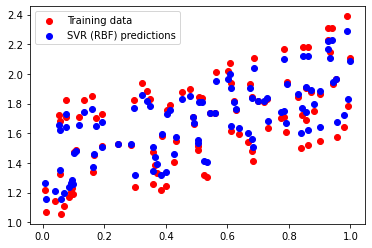

In [25]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], y, color='red', label='Training data')

# Plotting SVR (RBF) predictions for the training data
y_rbf_pred = svr_rbf.predict(X)
plt.scatter(X[:, 0], y_rbf_pred, color='blue', label='SVR (RBF) predictions')

plt.legend()
plt.show()


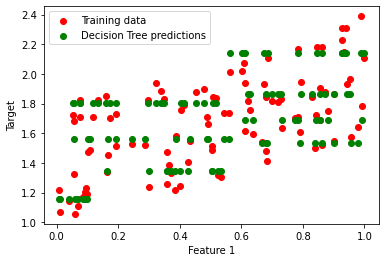

In [26]:
import matplotlib.pyplot as plt

# Plot the training data
plt.scatter(X[:, 0], y, color='red', label='Training data')



# Plotting the Decision Tree predictions for the training data
plt.scatter(X[:, 0], y_pred_tree, color='green', label='Decision Tree predictions')

# Add labels and legends to the plot
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()

# Show the plot
plt.show()


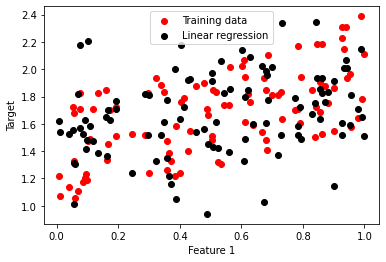

In [27]:
# Plot the training data
plt.scatter(X[:, 0], y, color='red', label='Training data')



# Plot the Linear Regression predictions for the training data
plt.scatter(X[:, 0], y_lr_pred, color='black', label='Linear regression')

plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.show()


$\mathbf{Exercise\, 4.}$ Create a classification benchmark with 3 labels.

Evaluate training and testing prediction metrics for the following classification methods:

- K-nearest neighbours
- Random Forest
- Naive Bayes

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [30]:
X = np.random.randn(100,3) #defined the X as it has 100 sample with dimension 3 
y = (X[:,0]+X[:,1]+X[:,2] > 0).astype(int) # comparing each element in form of boolean and values will be assigned as (false=0 and True=1)
y = np.where(y==1, 0, 1) #Mapping the values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #splitting the data using train_test_split

In [32]:
knn= KNeighborsClassifier(n_neighbors=4) #chose neighbours value=4, when I chose neighbours value=5 accuracy improved to 0.933
knn.fit(X_train,y_train)
y_knn_pred= knn.predict(X_test)

In [33]:
print("KNN Metrics:")
print("Accuracy", accuracy_score(y_test,y_knn_pred))

KNN Metrics:
Accuracy 0.7666666666666667


In [34]:
rf= RandomForestClassifier(n_estimators=50) #chose number of estimators as 50 and when I chose 100 it showed more accurate results anyway I was experimenting with it.
rf.fit(X_train,y_train)
y_rf_pred= rf.predict(X_test)

In [35]:
print("Random Forest Metrics:")
print("Accuracy", accuracy_score(y_test,y_rf_pred))

Random Forest Metrics:
Accuracy 0.7666666666666667


In [36]:
naive_b=GaussianNB()
naive_b.fit(X_train,y_train)
y_naive_pred=naive_b.predict(X_test)

In [37]:
print("GaussianNB Metrics:")
print("Accuracy", accuracy_score(y_test,y_naive_pred))

GaussianNB Metrics:
Accuracy 0.7333333333333333
